In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

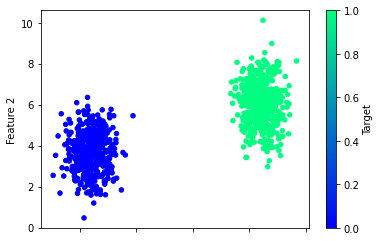

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 709us/step - loss: 0.5131 - accuracy: 0.9800
Epoch 2/100
24/24 [==============================] - 0s 542us/step - loss: 0.4999 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 542us/step - loss: 0.4867 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 542us/step - loss: 0.4737 - accuracy: 0.9987
Epoch 5/100
24/24 [==============================] - 0s 542us/step - loss: 0.4608 - accuracy: 0.9987
Epoch 6/100
24/24 [==============================] - 0s 500us/step - loss: 0.4482 - accuracy: 0.9973
Epoch 7/100
24/24 [==============================] - 0s 500us/step - loss: 0.4359 - accuracy: 0.9973
Epoch 8/100
24/24 [==============================] - 0s 583us/step - loss: 0.4239 - accuracy: 0.9973
Epoch 9/100
24/24 [==============================] - 0s 542us/step - loss: 0.4122 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 500us/step - loss: 0.4009 - accura

24/24 [==============================] - 0s 583us/step - loss: 0.0961 - accuracy: 1.0000
Epoch 80/100
24/24 [==============================] - 0s 583us/step - loss: 0.0945 - accuracy: 1.0000
Epoch 81/100
24/24 [==============================] - 0s 542us/step - loss: 0.0930 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 542us/step - loss: 0.0916 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 542us/step - loss: 0.0902 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 542us/step - loss: 0.0888 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 500us/step - loss: 0.0874 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 542us/step - loss: 0.0860 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 542us/step - loss: 0.0847 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 542us/step - loss: 0.0834 - accuracy: 

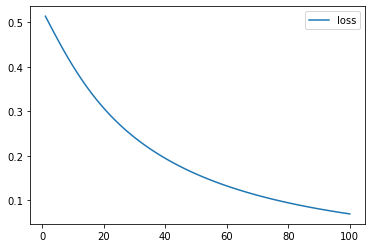

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

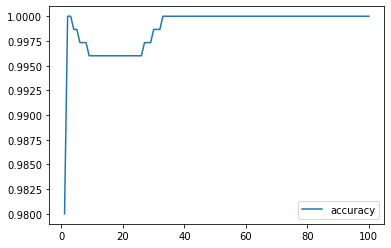

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0710 - accuracy: 1.0000
Loss: 0.0710061639547348, Accuracy: 1.0


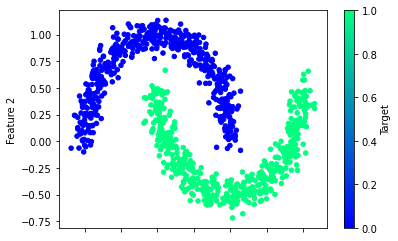

In [14]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [15]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [16]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1593 - accuracy: 0.4733
Epoch 2/100
24/24 [==============================] - 0s 792us/step - loss: 1.0268 - accuracy: 0.4947
Epoch 3/100
24/24 [==============================] - 0s 834us/step - loss: 0.9393 - accuracy: 0.5093
Epoch 4/100
24/24 [==============================] - 0s 792us/step - loss: 0.8807 - accuracy: 0.5253
Epoch 5/100
24/24 [==============================] - 0s 834us/step - loss: 0.8349 - accuracy: 0.5373
Epoch 6/100
24/24 [==============================] - 0s 792us/step - loss: 0.7994 - accuracy: 0.5507
Epoch 7/100
24/24 [==============================] - 0s 875us/step - loss: 0.7701 - accuracy: 0.5627
Epoch 8/100
24/24 [==============================] - 0s 833us/step - loss: 0.7453 - accuracy: 0.5787
Epoch 9/100
24/24 [==============================] - 0s 792us/step - loss: 0.7232 - accuracy: 0.5853
Epoch 10/100
24/24 [==============================] - 0s 792us/step - loss: 0.7034 - accuracy

24/24 [==============================] - 0s 834us/step - loss: 0.2822 - accuracy: 0.8800
Epoch 82/100
24/24 [==============================] - 0s 834us/step - loss: 0.2813 - accuracy: 0.8800
Epoch 83/100
24/24 [==============================] - 0s 875us/step - loss: 0.2804 - accuracy: 0.8813
Epoch 84/100
24/24 [==============================] - 0s 792us/step - loss: 0.2795 - accuracy: 0.8813
Epoch 85/100
24/24 [==============================] - 0s 833us/step - loss: 0.2787 - accuracy: 0.8813
Epoch 86/100
24/24 [==============================] - 0s 750us/step - loss: 0.2779 - accuracy: 0.8827
Epoch 87/100
24/24 [==============================] - 0s 792us/step - loss: 0.2772 - accuracy: 0.8840
Epoch 88/100
24/24 [==============================] - 0s 792us/step - loss: 0.2763 - accuracy: 0.8840
Epoch 89/100
24/24 [==============================] - 0s 792us/step - loss: 0.2756 - accuracy: 0.8840
Epoch 90/100
24/24 [==============================] - 0s 792us/step - loss: 0.2750 - accuracy: 

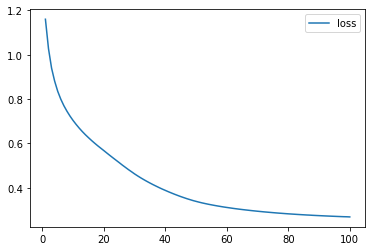

In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

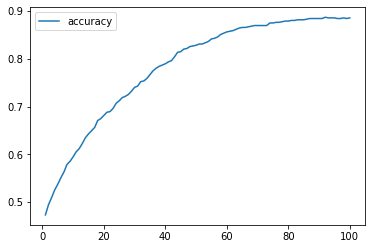

In [18]:
# Plot the loss
history_df.plot(y="accuracy")